# Exercise 2

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv

np.random.seed(1234)

In [46]:
def make_data(n, p, mean=0, cov=1):
    mean_vector = np.full((p,), mean)
    
    cov_diag = np.full((p,), cov)
    cov_matrix = np.diagflat(cov_diag)
    
    observations_x = (np.linspace(0, 1, num = n*p)).reshape(n, p)
    w = (np.random.normal(0, 0.1, n*p)).reshape(n, p)
    y = w * observations_x + 6
    r = np.random.multivariate_normal(mean_vector, cov_matrix, n)    
    observations_y = y + r
    
    return observations_x, observations_y

In [47]:
def linear_regression(train_X, train_Y, test_X, test_Y):
    regression_model = LinearRegression().fit(train_X, train_Y)

    train_results = regression_model.predict(train_X)
    test_results = regression_model.predict(test_X)

    train_error = mean_squared_error(train_Y, train_results)
    test_error = mean_squared_error(test_Y, test_results)
    parameters_norm = np.linalg.norm(regression_model.coef_)
    
    return train_error, test_error, parameters_norm

In [48]:
def test_regression(train_X, train_Y, test_X, test_Y, p):
    train_X = train_X[:,:p]
    test_X = test_X[:,:p]
    
    train_error, test_error, parameters_norm = linear_regression(train_X, train_Y, test_X, test_Y)
    
    return train_error, test_error, parameters_norm

In [49]:
n_train = 200
n_test = 100
max_features = 1000

train_X, train_Y = make_data(n_train, max_features, mean=0, cov=1)
test_X, test_Y = make_data(n_test, max_features, mean=0, cov=1)

ps = []
train_errors = []
test_errors = []
parameters_norms = []
with open('linear_regression_results.csv', 'w', newline='') as fout:
    writer = csv.DictWriter(fout, fieldnames=['# parameters', 'train loss', 'test loss', 'parameters norm'])
    writer.writeheader()
    for p in range(1, max_features, 50):
        train_error, test_error, parameters_norm = test_regression(train_X, train_Y, test_X, test_Y, p)
        ps.append(p)
        train_errors.append(train_error)
        test_errors.append(test_error)
        parameters_norms.append(parameters_norm)

        print('p: {} | train loss: {:.5f}; test loss: {:.5f}; norm: {:.5f}'.format(p, train_error, test_error, parameters_norm))

        writer.writerow({
            '# parameters': p,
            'train loss': train_error,
            'test loss': test_error,
            'parameters norm': parameters_norm
        })

p: 1 | train loss: 0.99415; test loss: 1.02087; norm: 7.99170
p: 51 | train loss: 0.99449; test loss: 2904122835436469760.00000; norm: 2400340828344507.00000
p: 101 | train loss: 0.99438; test loss: 156248815825909776384.00000; norm: 1947310743703311.00000
p: 151 | train loss: 1.02270; test loss: 269187471369410248704.00000; norm: 4717762634082532.00000
p: 201 | train loss: 1.03039; test loss: 3074350724406539452416.00000; norm: 4394027234175443.00000
p: 251 | train loss: 1.24235; test loss: 1594496807580517531648.00000; norm: 3389821627604610.00000
p: 301 | train loss: 1.07476; test loss: 10536984319329818378240.00000; norm: 3634333757446075.50000
p: 351 | train loss: 1.03188; test loss: 351126974564478943232.00000; norm: 580151778586835.87500
p: 401 | train loss: 1.06285; test loss: 1474312481082359676928.00000; norm: 1789130210939783.00000
p: 451 | train loss: 1.62305; test loss: 699487981314115502080.00000; norm: 626656004730403.75000
p: 501 | train loss: 1.15362; test loss: 469026

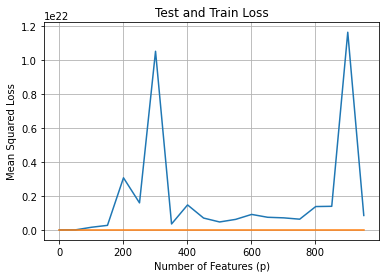

In [50]:
fig, ax = plt.subplots()
plt.plot(ps, test_errors)
ax.plot(ps, train_errors)

ax.set(xlabel='Number of Features (p)', ylabel='Mean Squared Loss',
       title='Test and Train Loss')
ax.grid()

(0.0, 30.0)

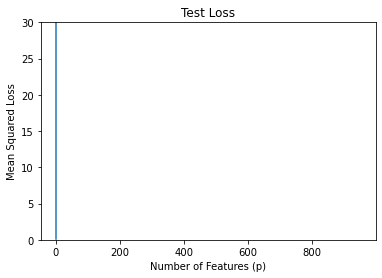

In [13]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Mean Squared Loss')
plt.title('Test Loss')
plt.plot(ps, test_errors)
plt.ylim(0, 30)

(0.0, 5.0)

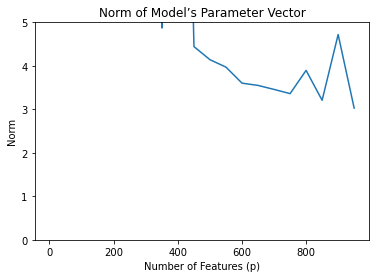

In [142]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Norm')
plt.title('Norm of Model’s Parameter Vector')
plt.plot(ps, parameters_norms)
plt.ylim(0, 5)